#               Short-TimeFourier Transform (STFT)

This code is related to the following section of [the paper](https://arxiv.org/abs/2403.17181):

## Section III:  SIGNAL TRANSFORMATION AND ANALYSIS
### B. Short-TimeFourier Transform (STFT)

For more details please refer to [the paper](https://arxiv.org/abs/2403.17181).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy
from scipy.signal import welch, stft
plt.rc('font',family='Times New Roman')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Create composite sinusoidal signal:

# Constants
fs_sin3 = 1600# Sampling frequency
#t = np.arange(0,  1, 1/fs) # Time vector
t_sin3 = np.arange(0, 512*3/fs_sin3, 1/fs_sin3) 

signal1 = 10*np.sin(2 * np.pi * 100 * t_sin3[:960]) 
signal2 = 5 * np.sin(2 * np.pi * 400 *t_sin3[960:1024])
signal3 = 20 * np.sin(2 * np.pi * 200 * t_sin3[1024:])
sin3 = np.concatenate([signal1, signal2, signal3])

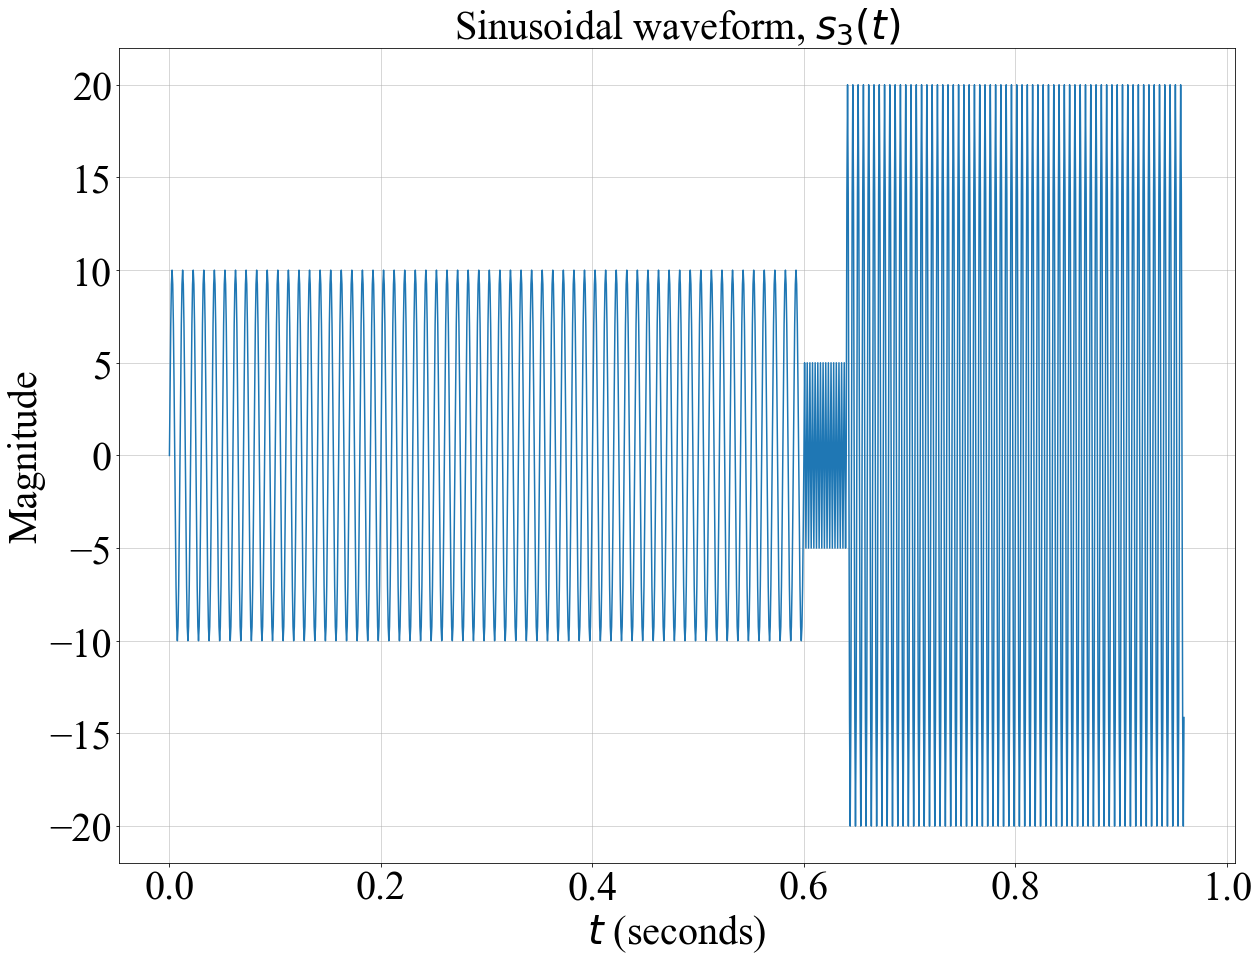

In [3]:
# Plot the signal
plt.figure(figsize=(20, 15))
plt.plot(t_sin3, sin3)
plt.title('Sinusoidal waveform, $s_3(t)$', fontsize = 40)
plt.xlabel('$t$ (seconds)', fontsize = 40)
plt.ylabel('Magnitude', fontsize = 40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize= 40)
#plt.xticks([])  
#plt.yticks([])  
plt.grid(which='both', linestyle='-', linewidth='0.5')
plt.show()


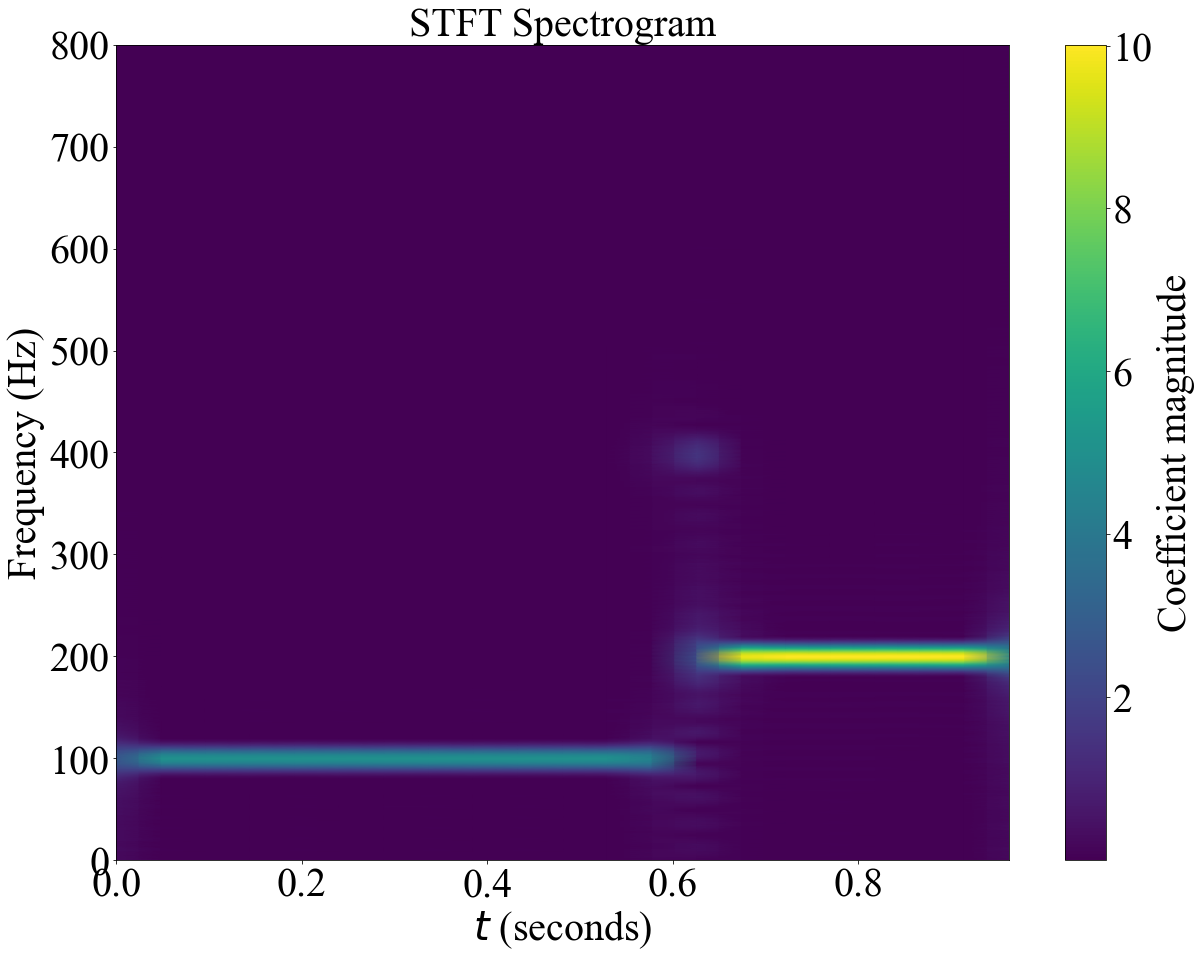

In [4]:
#STFT: 

seg_len = len(sin3) / 10  # Segment length.
overlap = 0.5*seg_len # Overlap between successive segments = 50% of segement length.
fft_length = 2048
win = 'hamming' # Segmentation window.

# STFT computation and plotting
f_stft, times, Zxx = stft(sin3, fs= fs_sin3, window= win, nperseg= seg_len, noverlap= overlap , nfft= fft_length) 
plt.figure(figsize=(20, 15))
plt.pcolormesh(times, f_stft, np.abs(Zxx), shading='gouraud')
plt.title('STFT Spectrogram', fontsize = 40)
plt.ylabel('Frequency (Hz)', fontsize = 40)
plt.xlabel('$t$ (seconds)', fontsize = 40)
cb = plt.colorbar()
cb.set_label(label='Coefficient magnitude', size=40)
cb.ax.tick_params(labelsize=40) 
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize= 40)
plt.show()
